In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns;  #makes graph colors pretty
from gensim.summarization import keywords
sns.set()
sns.palplot(sns.color_palette("muted"))


%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))



test_text
test_variants
training_text
training_variants



In [2]:
train_var_df = pd.read_csv("../input/training_variants")
test_var_df = pd.read_csv("../input/test_variants")
train_text_df = pd.read_csv("../input/training_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
test_text_df = pd.read_csv("../input/test_text", sep="\|\|", engine='python', header=None, skiprows=1, names=["ID","Text"])
#dataframe.shape returns a tuple representing dimensionality
print("Train and Test variants shape : ",train_var_df.shape, test_var_df.shape)
print("Train and Test text shape : ",train_text_df.shape, test_text_df.shape)

('Train and Test variants shape : ', (3321, 4), (5668, 3))
('Train and Test text shape : ', (3321, 2), (5668, 2))


In [3]:
#dataframe.head returns first 5 rows
#training variants
train_var_df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
#returns first 5 rows of training text
train_text_df.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [19]:
total_data = pd.concat([train_var_df.set_index('ID'),
                        train_text_df.set_index('ID')],axis=1)
total_data.head()

,Gene,Variation,Class,Text
ID,,,,
0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [17]:
total_data.describe(include='all')

,Gene,Variation,Class,Text
count,3321,3321,3321.000000,3316
unique,264,2996,NaN,1920
top,BRCA1,Truncating Mutations,NaN,The PTEN (phosphatase and tensin homolog) phos...
freq,264,93,NaN,53
mean,NaN,NaN,4.365854,NaN
std,NaN,NaN,2.309781,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,2.000000,NaN
50%,NaN,NaN,4.000000,NaN
75%,NaN,NaN,7.000000,NaN


In [15]:
#print 1st row from training text dataframe
# with open("../input/training_text") as infile:
#     for i in range(0,2):
#         line = infile.readline()
#         print(line)

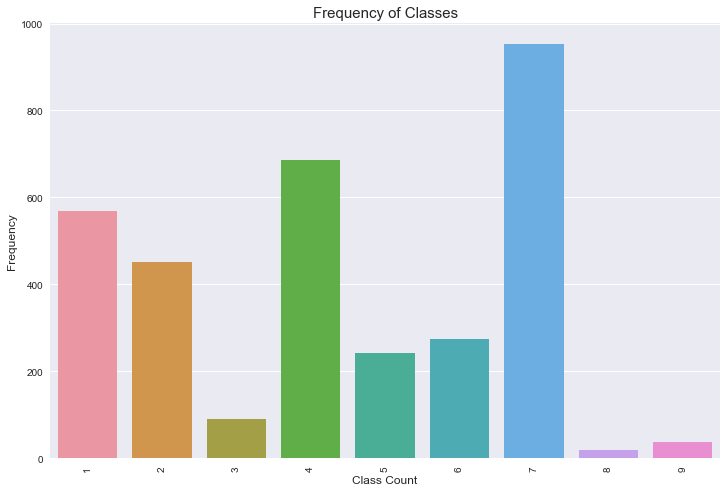

In [16]:
#frequenct of classes in training data
plt.figure(figsize=(12,8))
sns.countplot(x="Class", data=train_var_df)
plt.xlabel('Class Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Classes", fontsize=15)
plt.show()

In [8]:
#First column is Class
#Second column is Frequency
#All in training variants file
data=train_var_df
data["Class"].value_counts()      

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [9]:
#print(total_data)
total_data['Variation'].describe()

count                     3321
unique                    2996
top       Truncating Mutations
freq                        93
Name: Variation, dtype: object

In [10]:
#drop columns gene and variation
#print(total_data)
#total_data.drop(['Gene', 'Variation'], axis=1, inplace=True)


In [11]:
#https://rare-technologies.com/text-summarization-with-gensim/
from gensim.summarization import summarize
data_id = 0
#strictly gets the text from id 0
text = total_data.loc[data_id,'Text']
#print(text)
print 'Summary:'
#could set a limit on how many words to return etc.
print summarize(text,split=True)

Summary:
['Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations.', 'CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome.', 'ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels.', 'The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2).', 'CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6).Here, we deorphanize CDK10 by identifying cyclin M, the product of FAM58A, as a binding partner.', 'Mutations in this gene that pr

In [12]:
#algorithm tries to find words that are important 
#or seem representative of the entire text
from gensim.summarization import keywords
#lemmatisation determines the lemma of a word 
#based on its intended meaning
trigger_words = keywords(text,words = 5,scores=True,lemmatize=True, split=True)
print ("Keywords:")
trigger_words =', '.join(['{}-{:.2f}'.format(i, j) for i, j in trigger_words])
print ("["+trigger_words+"]")





Keywords:
[cdks-0.39, cells-0.23, ets-0.21, protein-0.21, gene-0.17]


In [13]:
#stop words #clean up
# fig -0.16